In [115]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import env
from pydataset import data

## For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be),
## then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

 Has the network latency gone up since we switched internet service providers?
 null: The network latency has stayed the same or decreased since switching providers
 alternative: The network latency has increased since we switch providers.

True Positive: Determine latency has increased and it has.
True Negative: Determine latency has decreased or stayed the same and it has.
Type I Error: Determine latency has increased when it actually decreased or stayed the same.
Type II Error: Determine latency has decreased or stayed the same and it actually increased.

Is the website redesign any good?
null: Website visitors has stayed the same or decreased since the redesign.
alternative: Website visitors have increased since the redesign.

True Positive: Determine website visitors have increased since the redesign and they have.
True Negative: Determine website visitors has stayed the same or decreased since the redesign and they have.
Type I Error: Determine website visitors have increased since the redesign and they actually decreased or stayed the same.
Type II Error: Determine website visitors has stayed the same or decreased since the redesign and they have actually increased.


Is our television ad driving more sales?
null: Sales have decreased or stayed the same after deploying the TV ad.
alternative: Sales have increased after deploying the TV ad.

True Positive: Determine sales have increased after deploying the TV ad and they have.
True Negative: Deteremine sales have decreased or stayed the same after deploying the TV ad and they have.
Type I Error: Determine sales have increased after deploying the TV ad and they actually went down or stayed the same.
Type II Error: Determine sales have decreased or stayed the same after deploying the TV ad and they actually increased.


In [ ]:
# Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 
# A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 
# A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 
# Use a .05 level of significance.


In [4]:
# Null: The average time to sell homes in office 1 == office 2
# Alternate: The average time to sell homes in office 1 != office 2

alpha = .05


In [12]:
t, p = stats.ttest_ind_from_stats(90,15,40, 100, 20, 50, equal_var=False)
t,p

(-2.7091418459143854, 0.00811206270346016)

In [13]:
if p < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis.


In [142]:
# Load the mpg dataset and use it to answer the following questions:

from pydataset import data
mpg = data('mpg')

mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

Null: There is no difference in fuel-efficiencies in cars from 2008 and 1999
Alternative: There is a difference in fuel-efficincies in cars from 2008 and 1999

In [144]:
mpg['avg_mpg'] = stats.hmean(mpg[['cty', 'hwy']], axis =1)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [23]:
mpg_2008 = mpg[mpg.year == 2008].avg_mpg
mpg_1999 = mpg[mpg.year == 1999].avg_mpg

<AxesSubplot:>

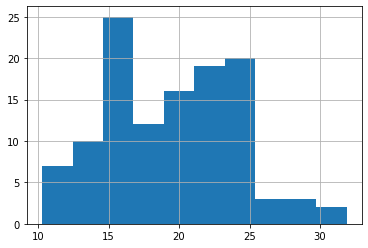

In [20]:
mpg_2008.hist()

<AxesSubplot:>

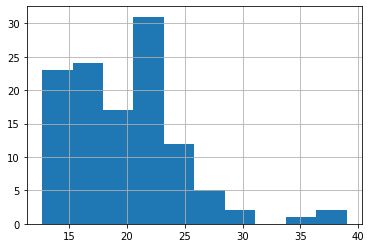

In [24]:
mpg_1999.hist()

In [25]:
#compare variance
mpg_2008.var(), mpg_1999.var()

(22.550836772260343, 25.850396545865912)

In [27]:
stats.levene(mpg_2008, mpg_1999) 
# if p of levene is > alpha variance == True 

LeveneResult(statistic=0.031071867429515194, pvalue=0.8602339200830025)

In [177]:
t,p = stats.ttest_ind(mpg_2008, mpg_1999)
t,p

(-0.3011962975077886, 0.7635345888327115)

In [176]:
if p < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Fail to reject the null hypothesis


Are compact cars more fuel-efficient than the average car?

Null: mpg for compact cars <= average mpg
Alternative: mpg for compact cars > than average mpg

In [33]:
mpg_compact = mpg[mpg['class'] == 'compact'].avg_mpg
population_mean = mpg.avg_mpg.mean()

In [34]:
mpg_compact.mean()

23.500416808701296

In [35]:
population_mean

19.585525317633177

In [150]:
t,p = stats.ttest_1samp(mpg_compact, population_mean)
t,p

(7.512360093161354, 1.5617666348807727e-09)

In [37]:
if (p/2 < alpha) and t > 0:
    print('Reject the null hypothesis')

Reject the null hypothesis


Do manual cars get better gas mileage than automatic cars?

Null: Manual cars mpg <= automatic cars mpg
Alternative: Manual cars mpg > automatic cars mpg

In [145]:
mpg_auto = mpg[mpg.trans.str.contains('auto')].avg_mpg
mpg_manual = mpg[mpg.trans.str.contains('manual')].avg_mpg

<AxesSubplot:>

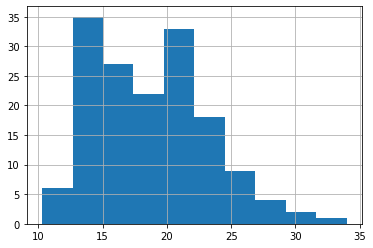

In [39]:
mpg_auto.hist()

<AxesSubplot:>

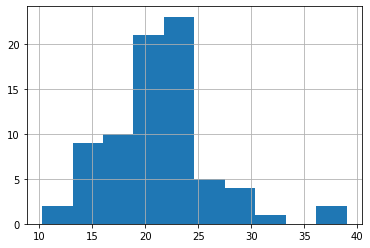

In [40]:
mpg_manual.hist()

In [41]:
stats.levene(mpg_auto, mpg_manual)

LeveneResult(statistic=0.013901207169738269, pvalue=0.9062462281015493)

In [148]:
t,p = stats.ttest_ind(mpg_manual, mpg_auto,  equal_var=True)
t, p/2

(4.652577547151351, 2.7552323050220026e-06)

In [45]:
if (p/2 < alpha) and t > 0:
    print('Reject the null hypothesis')

Reject the null hypothesis


Use the telco_churn data. Does tenure correlate with monthly charges? 
h0: There is no linear relationship between tenure and monthly charges.
ha: There is a linear relationship between tenure and monthly charges.

In [47]:
df = pd.read_csv('telco.csv')
df.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No,9.0
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No,9.1
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes,3.8
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes,12.6
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes,3.2


In [85]:
df.total_charges = df.total_charges.replace(' ', np.nan).astype(float)

In [87]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7038 entries, 0 to 7048
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7038 non-null   object 
 1   gender             7038 non-null   object 
 2   is_senior_citizen  7038 non-null   int64  
 3   partner            7038 non-null   object 
 4   dependents         7038 non-null   object 
 5   phone_service      7038 non-null   int64  
 6   internet_service   7038 non-null   int64  
 7   contract_type      7038 non-null   int64  
 8   payment_type       7038 non-null   object 
 9   monthly_charges    7038 non-null   float64
 10  total_charges      7038 non-null   float64
 11  churn              7038 non-null   object 
 12  tenure             7038 non-null   float64
dtypes: float64(3), int64(4), object(6)
memory usage: 769.8+ KB


<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

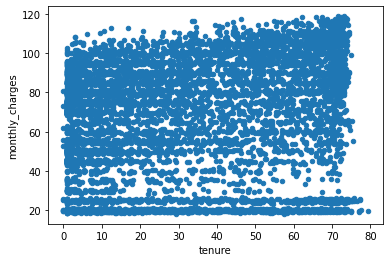

In [77]:
df.plot.scatter(y='monthly_charges', x='tenure')

In [81]:
alpha = .05

In [88]:
r, p = stats.pearsonr(df.tenure, df.monthly_charges)
r, p

(0.24614836711489288, 1.236598664483633e-97)

In [82]:
if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null")

Reject the null hypothesis


In [91]:
#Total charges? 
r, p = stats.pearsonr(df.tenure, df.total_charges)
r, p

(0.8258191824783714, 0.0)

In [80]:
if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null")

Reject the null hypothesis


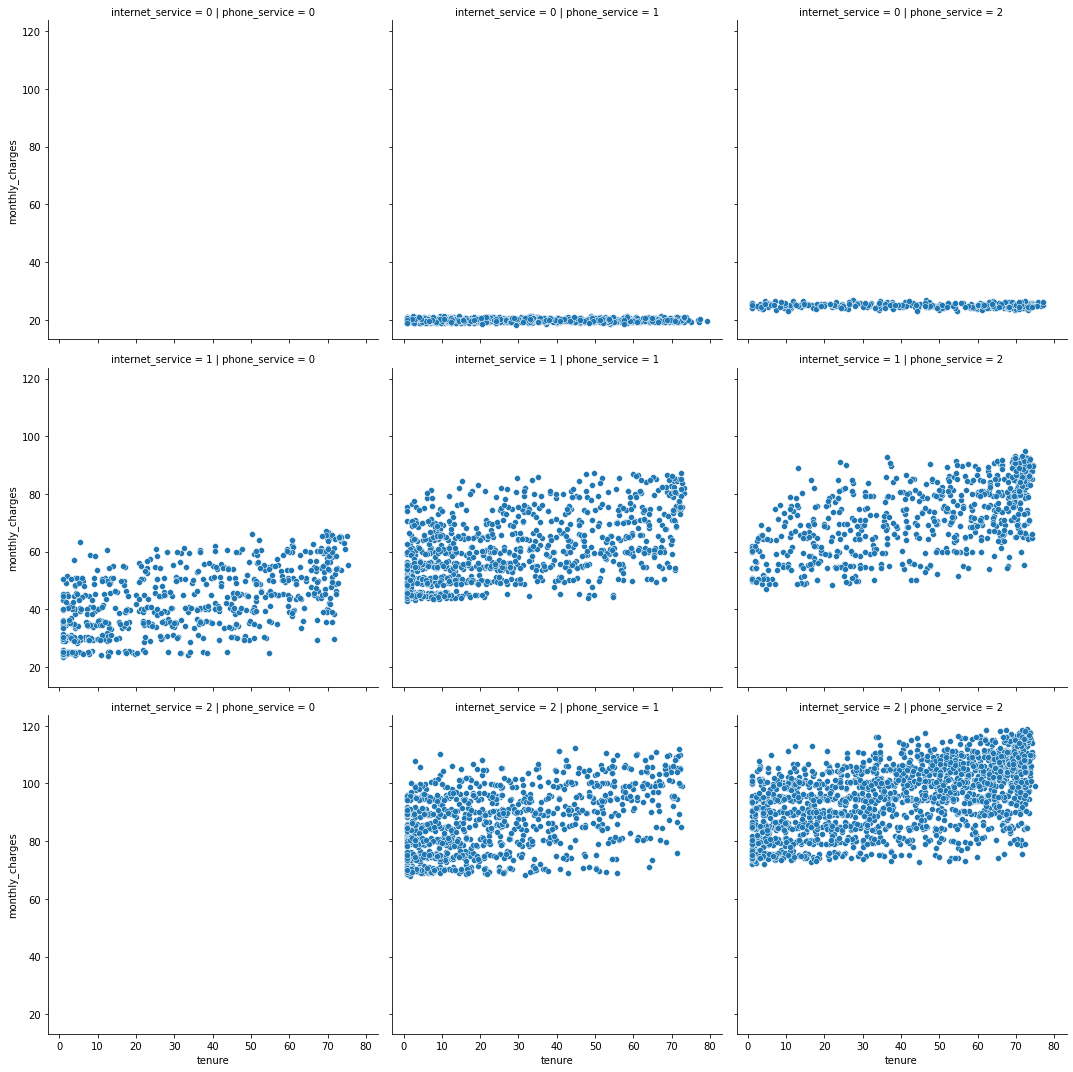

In [92]:
# What happens if you control for phone and internet service?

sns.relplot(x='tenure', y='monthly_charges', col='phone_service', row='internet_service', data =df)


In [93]:
no_phone = df[df.phone_service == 0]
one_phone = df[df.phone_service == 1]
two_phones = df[df.phone_service == 2]

In [94]:
r, p = stats.pearsonr(no_phone.tenure, no_phone.monthly_charges)
r,p

(0.5929219670151437, 6.954734519987262e-66)

In [71]:
r, p = stats.pearsonr(one_phone.tenure, one_phone.monthly_charges)
r,p

(0.06283175467854125, 0.00024901961360068487)

In [72]:
r, p = stats.pearsonr(two_phones.tenure, two_phones.monthly_charges)
r,p

(0.13827494239517407, 3.727813411453083e-14)

In [95]:
r, p = stats.pearsonr(no_phone.tenure, no_phone.total_charges)
r, p

(0.9543062640520061, 0.0)

In [96]:
# from exercise review, create df to show correlation
def corr_tenure_and_monthly(df):
    return pd.Series(stats.pearsonr(df.tenure, df.monthly_charges), index = ['r', 'p'])

In [97]:
df.groupby(['internet_service', 'phone_service']).apply(corr_tenure_and_monthly)

r              p
internet_service phone_service                         
0                1             -0.013593   6.404636e-01
                 2             -0.031353   5.645227e-01
1                0              0.592922   6.954735e-66
                 1              0.562383   2.328648e-88
                 2              0.610191   1.647669e-71
2                1              0.529938   5.607453e-85
                 2              0.573823  3.939472e-170

In [98]:
def corr_tenure_and_total(df):
    return pd.Series(stats.pearsonr(df.tenure, df.total_charges), index=['r', 'p'])

In [99]:
df.groupby(['internet_service', 'phone_service']).apply(corr_tenure_and_total)

r    p
internet_service phone_service               
0                1              0.999277  0.0
                 2              0.998031  0.0
1                0              0.954306  0.0
                 1              0.974356  0.0
                 2              0.967037  0.0
2                1              0.987473  0.0
                 2              0.983952  0.0

In [105]:
# Use the employees database.

sql = """
SELECT last_name, DATEDIFF((SELECT MAX(hire_date) FROM employees), employees.hire_date) AS tenure,
salaries.salary FROM employees 
JOIN salaries USING(emp_no)
WHERE salaries.to_date >= CURDATE();
"""
from env import get_db_url

url = get_db_url("employees")

df = pd.read_sql(sql,url)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   last_name  240124 non-null  object
 1   tenure     240124 non-null  int64 
 2   salary     240124 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 5.5+ MB


,last_name,tenure,salary
0,Facello,4964,88958
1,Simmel,5181,72527
2,Bamford,4901,43311
3,Koblick,4806,74057
4,Maliniak,3790,94692


In [107]:
# Is there a relationship between how long an employee has been with the company and their salary?
# h0: There is no linear relationship between tenure and salary.
# ha: There is a linear relationship between tenure and salary.
    
r, p = stats.pearsonr(df.tenure, df.salary)
r,p

(0.30646256131860894, 0.0)

In [108]:
if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null")

Reject the null hypothesis


In [ ]:
# reject the null but correlation is weak

In [111]:
# Is there a relationship between how long an employee has been with the company and the number of 
# titles they have had?
sql = '''
SELECT last_name, COUNT(title) AS title_no, DATEDIFF((SELECT MAX(hire_date) FROM employees), employees.hire_date) AS tenure
FROM employees
JOIN titles USING(emp_no)
GROUP BY emp_no;
'''
df = pd.read_sql(sql,url)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   last_name  300024 non-null  object
 1   title_no   300024 non-null  int64 
 2   tenure     300024 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 6.9+ MB


,last_name,title_no,tenure
0,Facello,1,4964
1,Simmel,1,5181
2,Bamford,1,4901
3,Koblick,2,4806
4,Maliniak,2,3790


In [ ]:
# h0: There is no linear relationship between tenure and number of titles.
# ha: There is a linear relationship between tenure and number of titles.

In [112]:
r, p = stats.pearsonr(df.tenure, df.title_no)
r,p

(0.2665989299136427, 0.0)

In [113]:
if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null")

Reject the null hypothesis


In [ ]:
# reject the null but correlation is weak

In [119]:
# Use the sleepstudy data. 
data('sleepstudy', show_doc=True)
sleep = data('sleepstudy')

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [120]:
sleep.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [122]:
# Is there a relationship between days and reaction time?
# h0: There is no linear relationship between days and reaction time.
# ha: There is a linear relationship between days and reaction time.

r, p = stats.pearsonr(sleep.Days, sleep.Reaction)
r,p

(0.5352302262650253, 9.894096322214812e-15)

In [123]:
if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null")

Reject the null hypothesis


In [ ]:
# there is moderate correlation

In [153]:
# Use the following contingency table to help answer the question of whether using a macbook and being a codeup 
# student are independent of each other.

# h0: macbook use and being a codeup student are independent
# ha: macbook use and being a codeup student are dependent 
index = ['Uses Macbook', 'No Macbook']
columns = ['Codeup Student', 'Not a Codeup Student']

observed = pd.DataFrame([[49,20], [1,30]], index=index, columns=columns)
observed

,Codeup Student,Not a Codeup Student
Uses Macbook,49,20
No Macbook,1,30


In [154]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

1.4116760526193828e-09

In [155]:
if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null")

Reject the null hypothesis


In [138]:
# Choose another 2 categorical variables from the mpg dataset and perform a chi2
# contingency table test with them. Be sure to state your null and alternative hypotheses.

mpg = data('mpg')
mpg.head(),mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


(  manufacturer model  displ  year  cyl       trans drv  cty  hwy fl    class
 1         audi    a4    1.8  1999    4    auto(l5)   f   18   29  p  compact
 2         audi    a4    1.8  1999    4  manual(m5)   f   21   29  p  compact
 3         audi    a4    2.0  2008    4  manual(m6)   f   20   31  p  compact
 4         audi    a4    2.0  2008    4    auto(av)   f   21   30  p  compact
 5         audi    a4    2.8  1999    6    auto(l5)   f   16   26  p  compact,
 None)

In [ ]:
# h0: Manufacturer and year are independent of each other.
# ha: Manufacturer and year are dependent on each other.


In [135]:
observed = pd.crosstab(mpg.manufacturer, mpg.year)
observed

year,1999,2008
manufacturer,,
audi,9,9
chevrolet,7,12
dodge,16,21
ford,15,10
honda,5,4
hyundai,6,8
jeep,2,6
land rover,2,2
lincoln,2,1


In [136]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

0.874845514166681

In [139]:
if p < alpha:
    print("Reject the null")
else:
    print('Fail to reject the null')

Fail to reject the null


In [162]:
from env import get_db_url

In [166]:
# Use the data from the employees database to answer these questions:

sql = """
SELECT gender, dept_name 
FROM employees
JOIN dept_emp USING(emp_no)
JOIN departments USING(dept_no) 
WHERE to_date >= CURDATE()
AND dept_name IN ('Sales', 'Marketing')
"""

url = get_db_url("employees")
df = pd.read_sql(sql,url)

df.head()




,gender,dept_name
0,F,Marketing
1,M,Marketing
2,F,Marketing
3,F,Marketing
4,F,Marketing


In [167]:
# Is an employee's gender independent of whether an employee works in sales or marketing?
# (only look at current employees)

# h0: An employee's gender and whether they work in sales or marketing is independent
# ha: An employee's gender and whether they work in sales or marketing is dependent

observed = pd.crosstab(df.gender, df.dept_name)
observed


dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [168]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

0.5691938610810126

In [169]:
if p < alpha:
    print("Reject the null")
else:
    print('Fail to reject the null')

Fail to reject the null


In [171]:
sql = '''
SELECT gender, title
FROM employees
JOIN titles using(emp_no)
'''

df = pd.read_sql(sql,url)

df.head()

,gender,title
0,M,Senior Engineer
1,F,Staff
2,M,Senior Engineer
3,M,Engineer
4,M,Senior Engineer


In [172]:
df['is_manager'] = df.title == 'Manager'
df.head()

,gender,title,is_manager
0,M,Senior Engineer,False
1,F,Staff,False
2,M,Senior Engineer,False
3,M,Engineer,False
4,M,Senior Engineer,False


In [173]:
# Is an employee's gender independent of whether or not they are or have been a manager?
# h0: Employee's gender and whether they are a manager are independent
# ha: Employee's gender and whether they are a manager are dependent

observed = pd.crosstab(df.gender, df.is_manager)
observed

is_manager,False,True
gender,,
F,177211,13
M,266073,11


In [174]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

0.22600394509880642

In [175]:
if p < alpha:
    print("Reject the null")
else:
    print('Fail to reject the null')

Fail to reject the null
